In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
img_path = '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/train/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150, 150))

print(img)
img_tensor = image.img_to_array(img)

print(img_tensor.shape, img_tensor)
img_tensor = np.expand_dims(img_tensor, axis = 0)

print(img_tensor.shape, img_tensor)
img_tensor /= 255

print(img_tensor.shape, img_tensor)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F76A8587F98>
(150, 150, 3) [[[164. 174. 186.]
  [161. 171. 183.]
  [161. 170. 185.]
  ...
  [198. 214. 240.]
  [200. 216. 242.]
  [200. 216. 242.]]

 [[160. 170. 182.]
  [157. 167. 179.]
  [158. 167. 182.]
  ...
  [199. 215. 241.]
  [201. 217. 243.]
  [201. 217. 243.]]

 [[161. 171. 183.]
  [159. 169. 181.]
  [160. 169. 184.]
  ...
  [199. 215. 241.]
  [199. 215. 241.]
  [199. 215. 241.]]

 ...

 [[ 66.  50.  51.]
  [ 53.  38.  41.]
  [ 31.  16.  23.]
  ...
  [214. 192. 178.]
  [196. 176. 152.]
  [195. 175. 150.]]

 [[ 69.  50.  52.]
  [ 58.  42.  45.]
  [ 45.  28.  36.]
  ...
  [218. 199. 185.]
  [210. 192. 170.]
  [199. 181. 157.]]

 [[ 62.  44.  42.]
  [ 56.  38.  38.]
  [ 43.  27.  30.]
  ...
  [210. 193. 175.]
  [209. 192. 172.]
  [197. 181. 158.]]]
(1, 150, 150, 3) [[[[164. 174. 186.]
   [161. 171. 183.]
   [161. 170. 185.]
   ...
   [198. 214. 240.]
   [200. 216. 242.]
   [200. 216. 242.]]

  [[160. 170. 182.]
   [157. 167. 179.

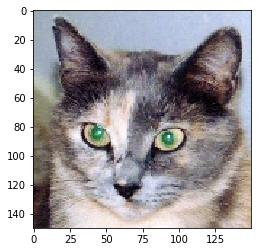

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

In [6]:
img_tensor[0]

array([[[0.6431373 , 0.68235296, 0.7294118 ],
        [0.6313726 , 0.67058825, 0.7176471 ],
        [0.6313726 , 0.6666667 , 0.7254902 ],
        ...,
        [0.7764706 , 0.8392157 , 0.9411765 ],
        [0.78431374, 0.84705883, 0.9490196 ],
        [0.78431374, 0.84705883, 0.9490196 ]],

       [[0.627451  , 0.6666667 , 0.7137255 ],
        [0.6156863 , 0.654902  , 0.7019608 ],
        [0.61960787, 0.654902  , 0.7137255 ],
        ...,
        [0.78039217, 0.84313726, 0.94509804],
        [0.7882353 , 0.8509804 , 0.9529412 ],
        [0.7882353 , 0.8509804 , 0.9529412 ]],

       [[0.6313726 , 0.67058825, 0.7176471 ],
        [0.62352943, 0.6627451 , 0.70980394],
        [0.627451  , 0.6627451 , 0.72156864],
        ...,
        [0.78039217, 0.84313726, 0.94509804],
        [0.78039217, 0.84313726, 0.94509804],
        [0.78039217, 0.84313726, 0.94509804]],

       ...,

       [[0.25882354, 0.19607843, 0.2       ],
        [0.20784314, 0.14901961, 0.16078432],
        [0.12156863, 0

In [7]:
from keras import models
from keras import layers
layer_outputs = []
for layer in model.layers[:8]:
    layer_outputs.append(layer.output)
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [8]:
activations = activation_model.predict(img_tensor)

In [19]:
activations[1].shape

(1, 74, 74, 32)

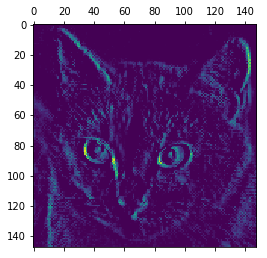

In [10]:
plt.matshow(activations[0][0, :, :, 4], cmap = 'viridis')

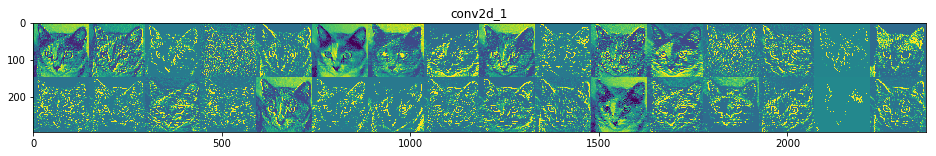

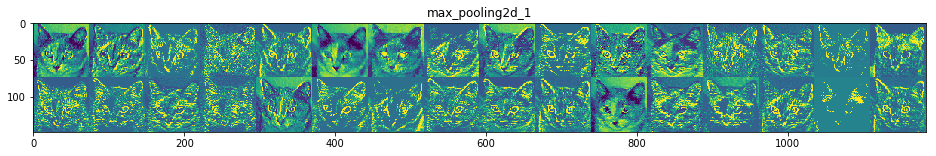

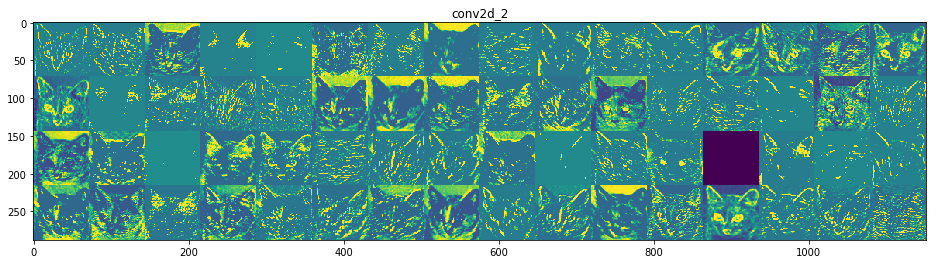

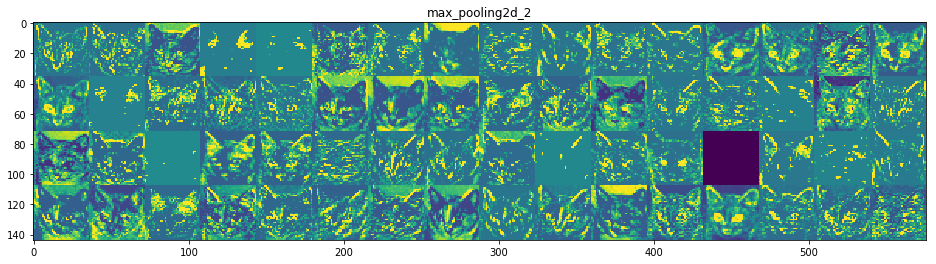

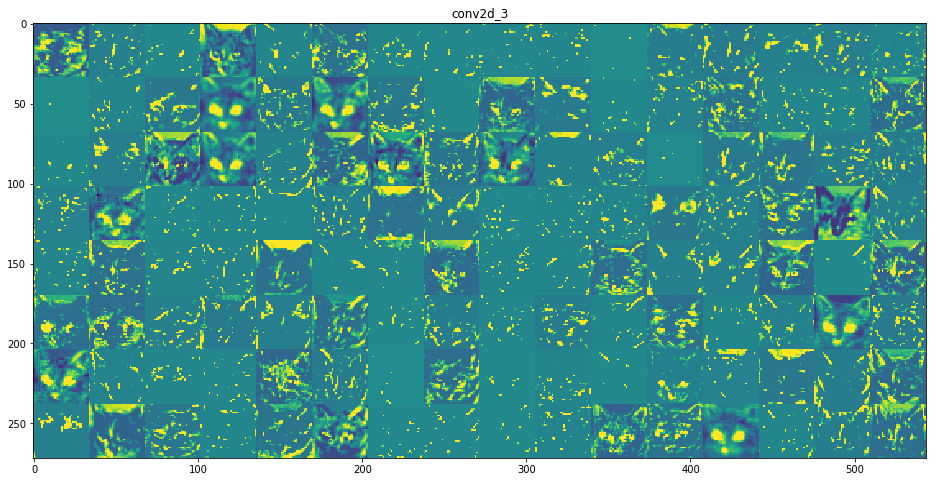

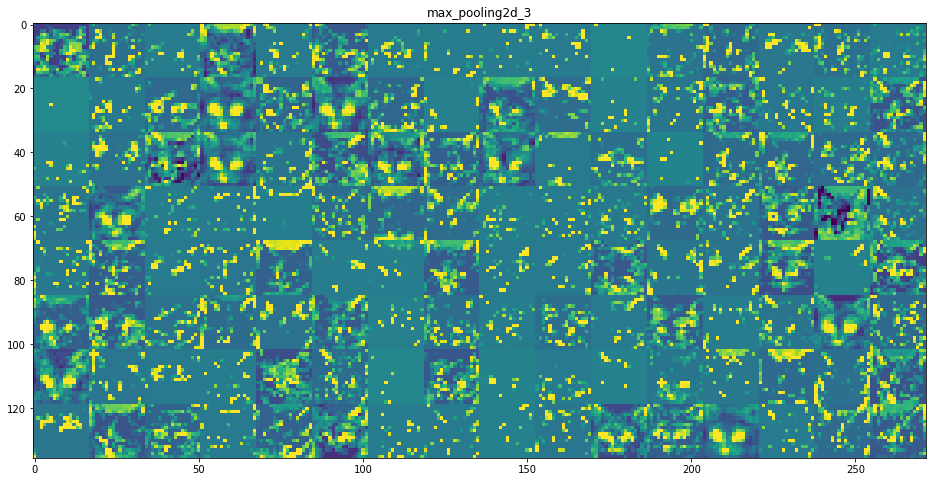

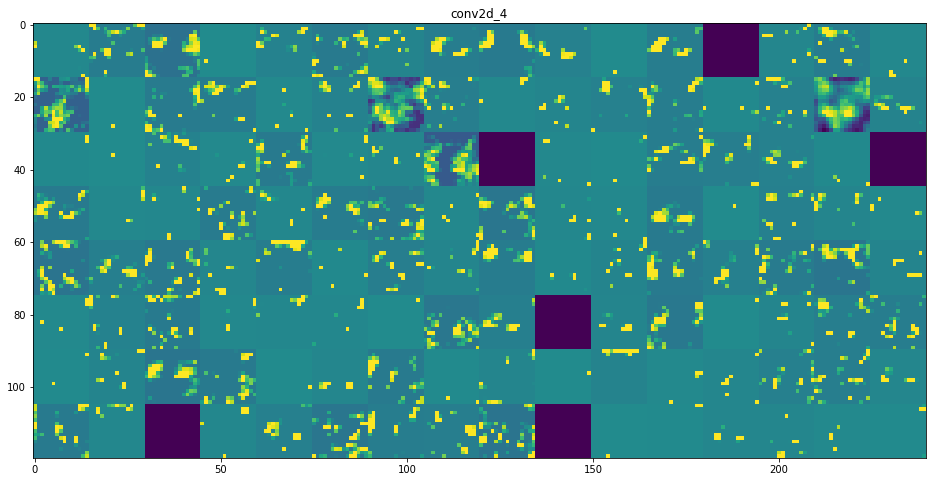

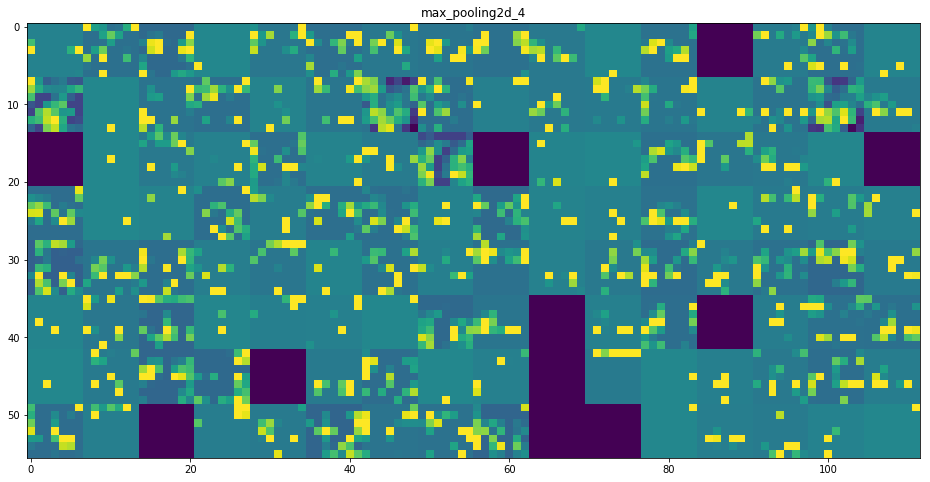

In [28]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # channel number
    
    size = layer_activation.shape[1] # height and width
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size)) #148 * 32, 16 * 148
    
    for col in range(n_cols):
        for row in range(images_per_row):
        
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')